In [1]:
!pip install pylatexenc qiskit qiskit_aer qiskit_ibm_runtime numpy matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.4/377.4 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 5.2 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=f4cf9c0a5b1cc6cb856e798ada0cf541c1d3a3e041866d38f11e88043ba006dd
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178b

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy
from qiskit import QuantumCircuit
from qiskit_aer.primitives import SamplerV2
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram

## In classical computing, randomness is usually pseudo-random — produced by deterministic algorithms that only imitate randomness.
## However, quantum mechanics provides true randomness, arising from the fundamental indeterminacy of measurement outcomes.

## A quantum coin toss is the simplest form of a Quantum Random Number Generator (QRNG):
	## 1.Start with a qubit initialized in the state |0\rangle.
	## 2.	Apply a Hadamard gate H, which creates a superposition:
## |ᴪ⟩ = (|0⟩ + |1⟩)/√2
	3.	Measure the qubit in the computational basis.
## The result collapses randomly to either |0⟩ (“Heads”) or |1⟩ (“Tails”) — each with equal probability 1/2.

## By extending this to multiple qubits, we can generate multi-bit random numbers, forming the foundation of quantum random number generators (QRNGs).
## The randomness here is intrinsic and non-deterministic, guaranteed by quantum mechanics itself — not by algorithmic complexity.

In [2]:
6111
n_qubits = int(input("Enter the length of the bitstring: "))       # generate 8-bit random numbers
samples = int(input("Enter the number of shots: "))

Enter the length of the bitstring: 20
Enter the number of shots: 1000


In [3]:
# --- Quantum Random Number Generator  ---
def quantum_rng_v2(n_bits=n_qubits, n_samples=samples, show_circuit = True):
    qc = QuantumCircuit(n_bits)
    qc.h(range(n_bits))
    qc.measure_all()
    if show_circuit:
        display(qc.draw('text')) # Changed from 'mpl' to 'text'
    sampler = SamplerV2()
    job = sampler.run([(qc,)], shots=n_samples)
    result = job.result()
    pub = result[0]

    # ✅ Convert to measurement counts
    counts = pub.data.meas.get_counts()
    return counts

In [4]:
# --- Randomness Certification ---
def randomness_certification(counts):
    n_samples = sum(counts.values())
    probs = np.array(list(counts.values())) / n_samples

    H = entropy(probs, base=2)
    max_H = np.log2(len(counts))
    randomness_ratio = H / max_H * 100

    print(f"Shannon Entropy: {H:.3f} bits (of {max_H:.3f} max)")
    print(f"Randomness Ratio: {randomness_ratio:.2f}%")

    # Bias (mean deviation from 0.5)
    all_bits = ''.join(k * v for k, v in counts.items())
    bits = np.array(list(map(int, ''.join(all_bits))))
    bias = abs(np.mean(bits) - 0.5)
    print(f"Bias from 0.5: {bias:.4f}")

    print("\nQuantum Certification Idea:")
    print("  – Randomness arises from measurement collapse of |+⟩ states.")


In [7]:
# --- Run everything ---
counts = quantum_rng_v2(n_bits=n_qubits, n_samples=samples)
randomness_certification(counts)

┌───┐ ░ ┌─┐                                                         
    q_0: ┤ H ├─░─┤M├─────────────────────────────────────────────────────────
         ├───┤ ░ └╥┘┌─┐                                                      
    q_1: ┤ H ├─░──╫─┤M├──────────────────────────────────────────────────────
         ├───┤ ░  ║ └╥┘┌─┐                                                   
    q_2: ┤ H ├─░──╫──╫─┤M├───────────────────────────────────────────────────
         ├───┤ ░  ║  ║ └╥┘┌─┐                                                
    q_3: ┤ H ├─░──╫──╫──╫─┤M├────────────────────────────────────────────────
         ├───┤ ░  ║  ║  ║ └╥┘┌─┐                                             
    q_4: ┤ H ├─░──╫──╫──╫──╫─┤M├─────────────────────────────────────────────
         ├───┤ ░  ║  ║  ║  ║ └╥┘┌─┐                                          
    q_5: ┤ H ├─░──╫──╫──╫──╫──╫─┤M├──────────────────────────────────────────
         ├───┤ ░  ║  ║  ║  ║  ║ └╥┘┌─┐                                       
    q_6: ┤ H ├─░──╫──╫──╫──╫──╫──╫─┤M├───────────────────────────────────────
         ├───┤ ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐                                    
    q_7: ┤ H ├─░──╫──╫──╫──╫──╫──╫──╫─┤M├────────────────────────────────────
         ├───┤ ░  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐                                 
    q_8: ┤ H ├─░──╫──╫──╫──╫──╫──╫──╫──╫─┤M├─────────────────────────────────
         ├───┤ ░  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐                              
    q_9: ┤ H ├─░──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├──────────────────────────────
         ├───┤ ░  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐                           
   q_10: ┤ H ├─░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├───────────────────────────
         ├───┤ ░  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐                        
   q_11: ┤ H ├─░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├────────────────────────
         ├───┤ ░  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐                     
   q_12: ┤ H ├─░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├─────────────────────
         ├───┤ ░  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐                  
   q_13: ┤ H ├─░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├──────────────────
         ├───┤ ░  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐               
   q_14: ┤ H ├─░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├───────────────
         ├───┤ ░  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐            
   q_15: ┤ H ├─░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├────────────
         ├───┤ ░  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐         
   q_16: ┤ H ├─░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├─────────
         ├───┤ ░  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐      
   q_17: ┤ H ├─░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├──────
         ├───┤ ░  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐   
   q_18: ┤ H ├─░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├───
         ├───┤ ░  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
   q_19: ┤ H ├─░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├
         └───┘ ░  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘
meas: 20/═════════╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩═
                  0  1  2  3  4  5  6  7  8  9  10 11 12 13 14 15 16 17 18 19

Shannon Entropy: 9.966 bits (of 9.966 max)
Randomness Ratio: 100.00%
Bias from 0.5: 0.0035

Quantum Certification Idea:
  – Randomness arises from measurement collapse of |+⟩ states.


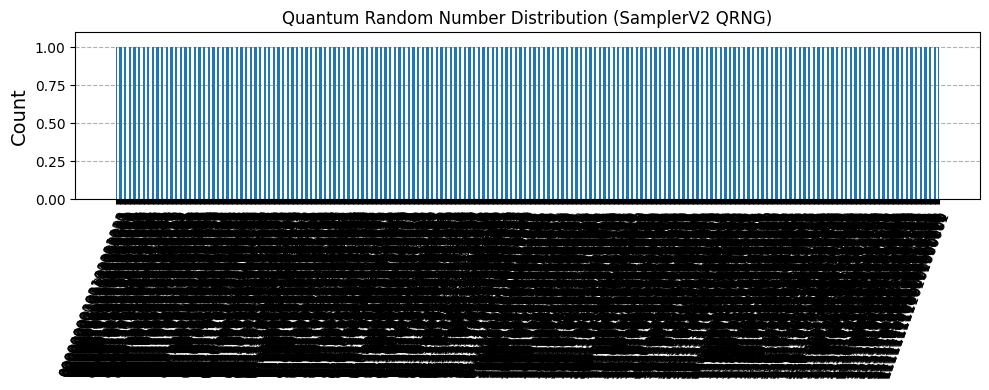

In [8]:
plot_histogram(
        counts,
        title="Quantum Random Number Distribution (SamplerV2 QRNG)",
        figsize=(10, 4),
        bar_labels=False
    )